In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the data

In [2]:
titanic = pd.read_csv("titanic.csv")
titanic_test = pd.read_csv("titanic_test_data.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Variable Description

##### PassengerId: unique id number to each passenger
##### Survived: passenger survive(1) or died(0)
##### Pclass: passenger class
##### Name: name
##### Sex: gender of passenger
##### Age: age of passenger
##### SibSp: number of siblings/spouses
##### Parch: number of parents/children
##### Ticket: ticket number
##### Fare: amount of money spent on ticket
##### Cabin: cabin category
##### Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

### Count of Missing Values

In [4]:
titanic.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Percentage of Missing Values

In [5]:
titanic.isnull().sum() / len(titanic) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

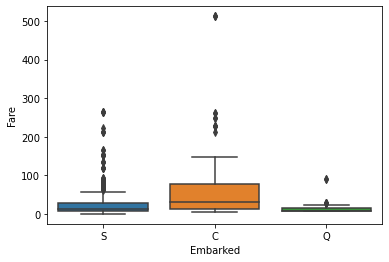

In [6]:
sns.boxplot(y="Fare",x = "Embarked",data=titanic)
plt.show()

In [7]:
titanic["Embarked"] = titanic["Embarked"].fillna("C")

In [8]:
titanic['Age'].fillna(titanic['Age'].median(),inplace= True)

In [9]:
titanic['Cabin'].fillna(titanic['Cabin'].mode(),inplace= True)

In [10]:
titanic_test.isnull().sum() / len(titanic) * 100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             9.652076
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.112233
Cabin          36.700337
Embarked        0.000000
dtype: float64

In [11]:
titanic_test['Age'].fillna(titanic_test['Age'].median(),inplace= True)

In [12]:
titanic_test['Fare'].fillna(titanic_test['Fare'].median(),inplace= True)

In [13]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Count The Survived Passengeres

In [14]:
titanic["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

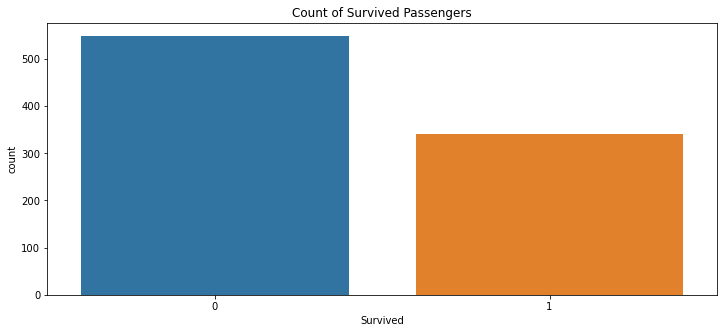

In [15]:
plt.figure(figsize= (12,5))
sns.countplot(data=titanic, x= "Survived")
plt.title("Count of Survived Passengers")
plt.show()

In [16]:
titanic["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [17]:
# Females were survived
titanic[titanic["Sex"]=="female"]["Survived"].value_counts()

1    233
0     81
Name: Survived, dtype: int64

In [18]:
# Sex vs Survived
titanic[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


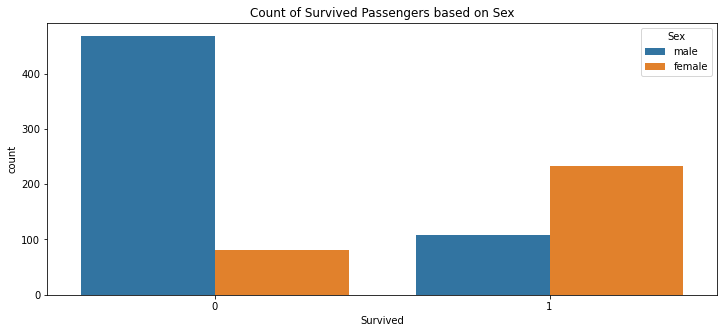

In [19]:
plt.figure(figsize= (12,5))
sns.countplot(data=titanic, x= "Survived", hue= "Sex")
plt.title("Count of Survived Passengers based on Sex")
plt.show()

#### Look at the chart, most of survived passengers were females and most of un survived passengers were males

#              

In [20]:
titanic["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [21]:
# Plcass vs Survived
titanic[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


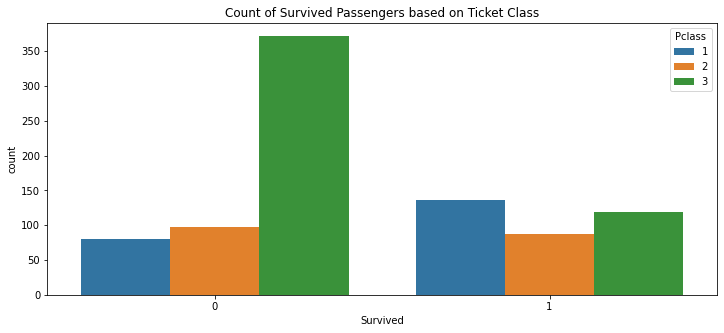

In [22]:
plt.figure(figsize= (12,5))
sns.countplot(data=titanic, x= "Survived", hue= "Pclass")
plt.title("Count of Survived Passengers based on Ticket Class")
plt.show()

#### Look at the chart, most of survived passengers were on the first class and most of un survived passengers were on the third class

#         

In [23]:
titanic["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [24]:
# SibSp vs Survived
titanic[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


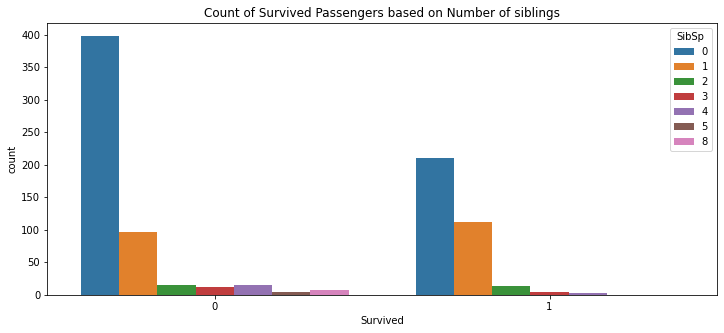

In [25]:
plt.figure(figsize= (12,5))
sns.countplot(data=titanic, x= "Survived", hue= "SibSp")
plt.title("Count of Survived Passengers based on Number of siblings")
plt.show()

#### Look at the chart, most of survived passengers have less than 2 siblings

#          

In [26]:
titanic["Embarked"].value_counts()

S    644
C    170
Q     77
Name: Embarked, dtype: int64

In [27]:
# Embarked vs Survived
titanic[["Embarked","Survived"]].groupby(["Embarked"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Embarked,Survived
0,C,0.558824
1,Q,0.389610
2,S,0.336957


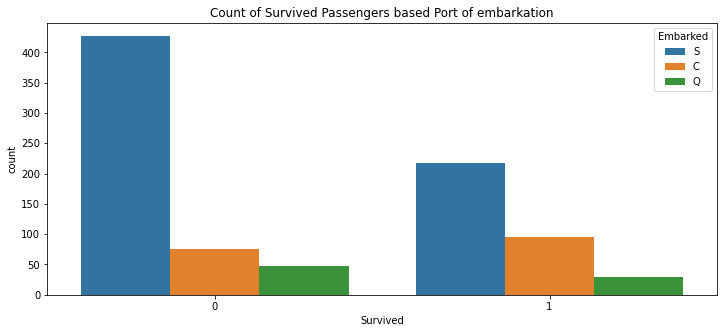

In [28]:
plt.figure(figsize= (12,5))
sns.countplot(data=titanic, x= "Survived", hue= "Embarked")
plt.title("Count of Survived Passengers based Port of embarkation")
plt.show()

In [29]:
# Parch vs Survived
titanic[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


#### Small familes have more chance to survive.

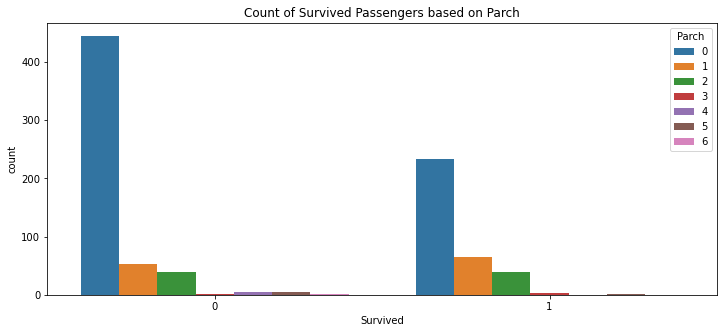

In [30]:
plt.figure(figsize= (12,5))
sns.countplot(data=titanic, x= "Survived", hue= "Parch")
plt.title("Count of Survived Passengers based on Parch")
plt.show()

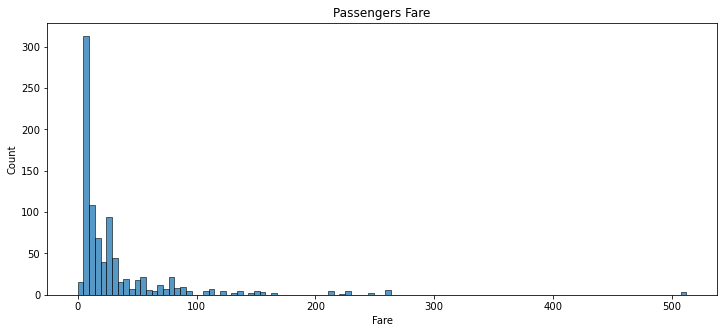

In [31]:
plt.figure(figsize= (12,5))
sns.histplot(titanic["Fare"])
plt.title("Passengers Fare")
plt.show()

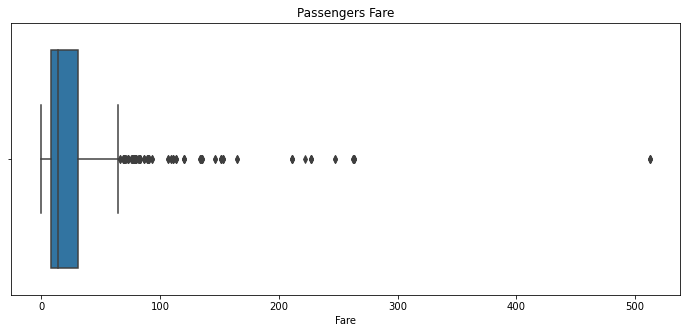

In [32]:
plt.figure(figsize= (12,5))
sns.boxplot(titanic, x="Fare")
plt.title("Passengers Fare")
plt.show()

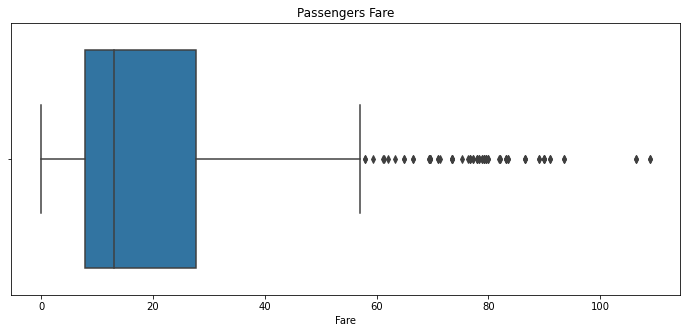

In [33]:
# Passengeres with Fare which less than 110 $
plt.figure(figsize= (12,5))
sns.boxplot(titanic[titanic["Fare"]<110], x="Fare")
plt.title("Passengers Fare")
plt.show()

#### Look at the chart, most of Passengers Fare less than 30$

# 

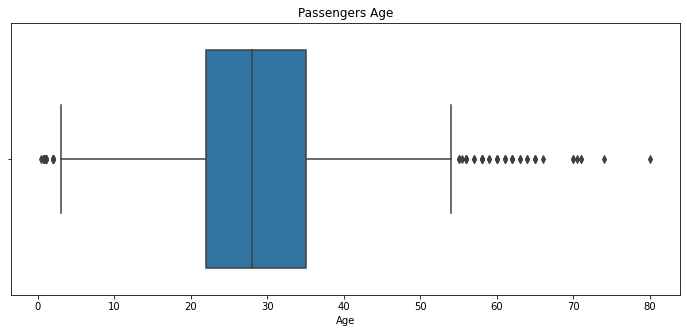

In [34]:
plt.figure(figsize= (12,5))
sns.boxplot(data=titanic, x= "Age")
plt.title("Passengers Age")
plt.show()

#### Look at the chart, most of Passengers Age in the Range between 20 & 40 years old

# 

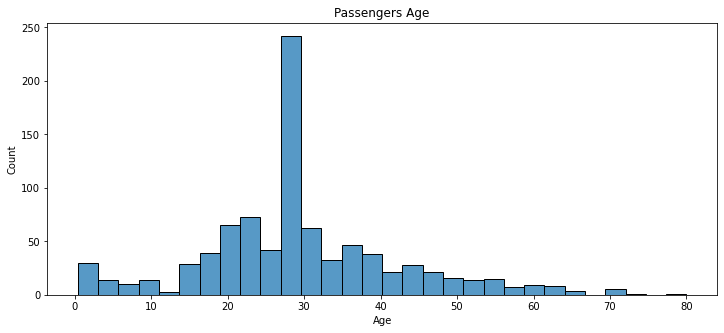

In [35]:
plt.figure(figsize= (12,5))
sns.histplot(titanic["Age"])
plt.title("Passengers Age")
plt.show()

#### Look at the chart, it looks like right-skewed

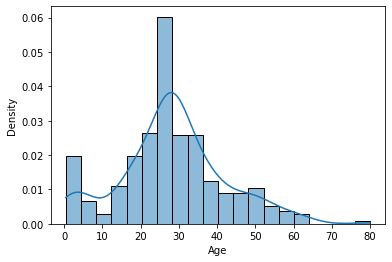

In [36]:
sns.histplot(titanic[titanic["Survived"]==1]["Age"], kde=True, stat="density")
plt.show()

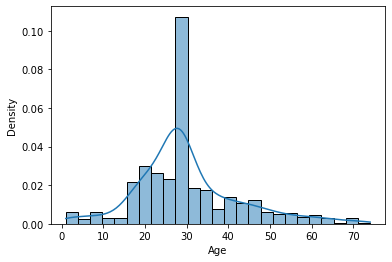

In [37]:
sns.histplot(titanic[titanic["Survived"]==0]["Age"], kde=True, stat="density")
plt.show()

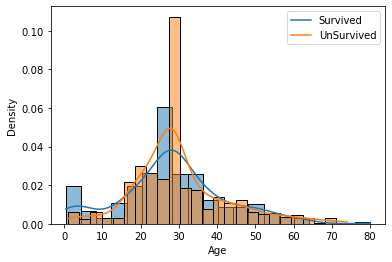

In [38]:
sns.histplot(titanic[titanic["Survived"]==1]["Age"], kde=True, stat="density")
sns.histplot(titanic[titanic["Survived"]==0]["Age"], kde=True, stat="density")
plt.legend(["Survived","UnSurvived"])
plt.show()

###### Most of Children were survived
###### Old Passengeres ( > 75 years old ) were survived
###### large number of youth Passengers did not survive

# 

## Detect Outliers

In [39]:
from collections import Counter

def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [40]:
detect_outliers(titanic,["Age","SibSp","Parch","Fare"])

[7,
 16,
 119,
 164,
 268,
 297,
 305,
 386,
 438,
 587,
 642,
 659,
 745,
 824,
 879,
 27,
 88,
 159,
 180,
 201,
 324,
 341,
 792,
 846,
 863]

# Data Preprocessing

In [41]:
titanic["Embarked"].value_counts()

S    644
C    170
Q     77
Name: Embarked, dtype: int64

In [42]:
titanic['Embarked'].replace('Q', 0,inplace=True)
titanic['Embarked'].replace('S', 1,inplace=True)
titanic['Embarked'].replace('C', 2,inplace=True)

In [43]:
titanic_test['Embarked'].replace('Q', 0,inplace=True)
titanic_test['Embarked'].replace('S', 1,inplace=True)
titanic_test['Embarked'].replace('C', 2,inplace=True)

In [44]:
titanic["Embarked"].value_counts()

1    644
2    170
0     77
Name: Embarked, dtype: int64

In [45]:
titanic["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [46]:
titanic['Sex'].replace('male', 1,inplace=True)
titanic['Sex'].replace('female', 0,inplace=True)

In [47]:
titanic_test['Sex'].replace('male', 1,inplace=True)
titanic_test['Sex'].replace('female', 0,inplace=True)

In [48]:
titanic["Sex"].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [49]:
titanic.drop('PassengerId',axis=1,inplace=True)

In [50]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [51]:
titanic_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [52]:
combine = [titanic, titanic_test]
print("Before", titanic.shape, titanic_test.shape, combine[0].shape, combine[1].shape)

titanic = titanic.drop(['Ticket', 'Cabin'], axis=1)
titanic_test = titanic_test.drop(['Ticket', 'Cabin'], axis=1)

print("After", titanic.shape, titanic_test.shape, combine[0].shape, combine[1].shape)

Before (891, 11) (418, 11) (891, 11) (418, 11)
After (891, 9) (418, 9) (891, 11) (418, 11)


In [53]:
titanic['Title'] = titanic.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
titanic_test['Title'] = titanic_test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(titanic['Title'], titanic['Sex'])

Sex,0,1
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [54]:
titanic['Title'] = titanic['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

titanic['Title'] = titanic['Title'].replace('Mlle', 'Miss')
titanic['Title'] = titanic['Title'].replace('Ms', 'Miss')
titanic['Title'] = titanic['Title'].replace('Mme', 'Mrs')

titanic[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by="Survived",ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [55]:
titanic_test['Title'] = titanic_test['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

titanic_test['Title'] = titanic_test['Title'].replace('Mlle', 'Miss')
titanic_test['Title'] = titanic_test['Title'].replace('Ms', 'Miss')
titanic_test['Title'] = titanic_test['Title'].replace('Mme', 'Mrs')

titanic_test[['Title']]

,Title
0,Mr
1,Mrs
2,Mr
3,Mr
4,Mrs
...,...
413,Mr
414,Rare
415,Mr
416,Mr


In [56]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
titanic['Title'] = titanic['Title'].map(title_mapping)
titanic['Title'] = titanic['Title'].fillna(0)

titanic_test['Title'] = titanic_test['Title'].map(title_mapping)
titanic_test['Title'] = titanic_test['Title'].fillna(0)


titanic[["Title"]].sample(5)

,Title
80,1
382,1
570,1
653,2
471,1


In [57]:
titanic_test[["Title"]].sample(5)

,Title
371,2
116,1
361,3
228,1
131,5


In [58]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'],
      dtype='object')

In [59]:
titanic.drop("Name",axis="columns",inplace= True)
titanic_test.drop("Name",axis="columns",inplace= True)

In [60]:
titanic_test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'],
      dtype='object')

In [61]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int64  
 8   Title        418 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


In [62]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
 8   Title     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [63]:
titanic.fillna(0,inplace= True)

In [64]:
titanic.shape , titanic_test.shape

((891, 9), (418, 9))

In [65]:
titanic.columns , titanic_test.columns

(Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
        'Embarked', 'Title'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
        'Embarked', 'Title'],
       dtype='object'))

In [66]:
set(titanic.columns) ^ set(titanic_test.columns)

{'PassengerId', 'Survived'}

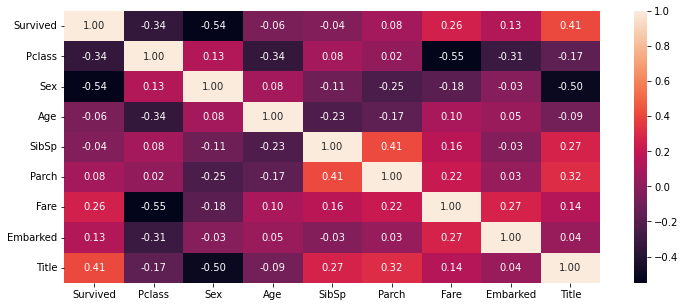

In [67]:
plt.figure(figsize=(12,5))
sns.heatmap(titanic.corr(), annot = True, fmt = ".2f")
plt.show()

In [68]:
X_train = titanic.drop("Survived", axis=1)
Y_train = titanic["Survived"]
X_test  = titanic_test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [70]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.26

In [71]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

98.2